# Census Income Project.<br>
## Problem Statement:<br>

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.<br>

Description of fnlwgt (final weight)<br><br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. <br>

These are:<br>

A single cell estimate of the population 16+ for each state.<br>

Controls for Hispanic Origin by age and sex.<br>

Controls by Race, age and sex.<br>

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# IMPORTING DATA AND LIBRARIES.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 32560 rows and 15 columns. Income would be our target feature.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are columns data type with interger.<br>
Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income are columns are with object datatypes.<br>

In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset.

# EDA AND PREPROCESSING.

<AxesSubplot:xlabel='Income', ylabel='count'>

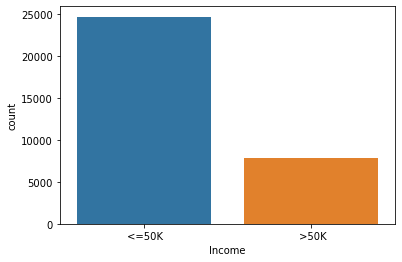

In [6]:
sns.countplot(df['Income'])

In [7]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There are more people who fall under 50k than above 50k. For our convenience we will map the two categories in binary values.

In [8]:
df['Age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

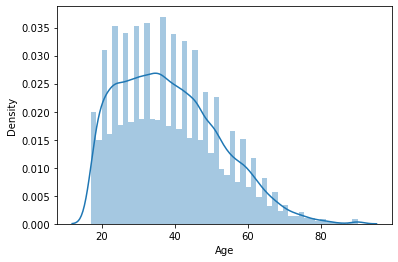

In [9]:
sns.distplot(df['Age'])

There are more people between ages 16-45.

<AxesSubplot:xlabel='Income', ylabel='Age'>

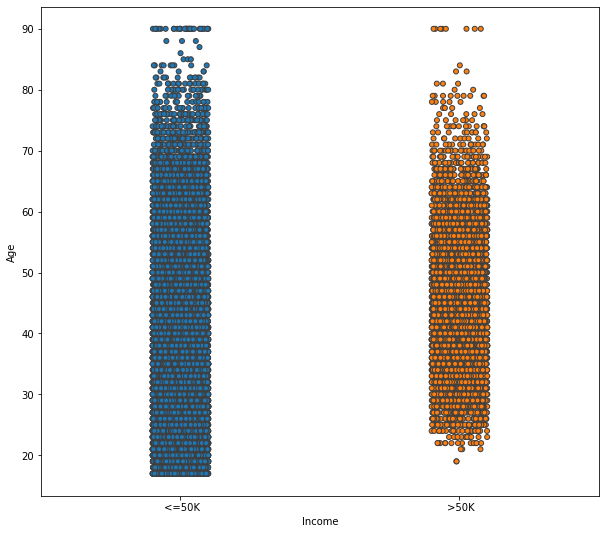

In [10]:
plt.figure(figsize=(10,9))
sns.stripplot(df['Income'], df['Age'],linewidth=1)

People making more money are from age 21 - 70. People with less money are in every age range.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

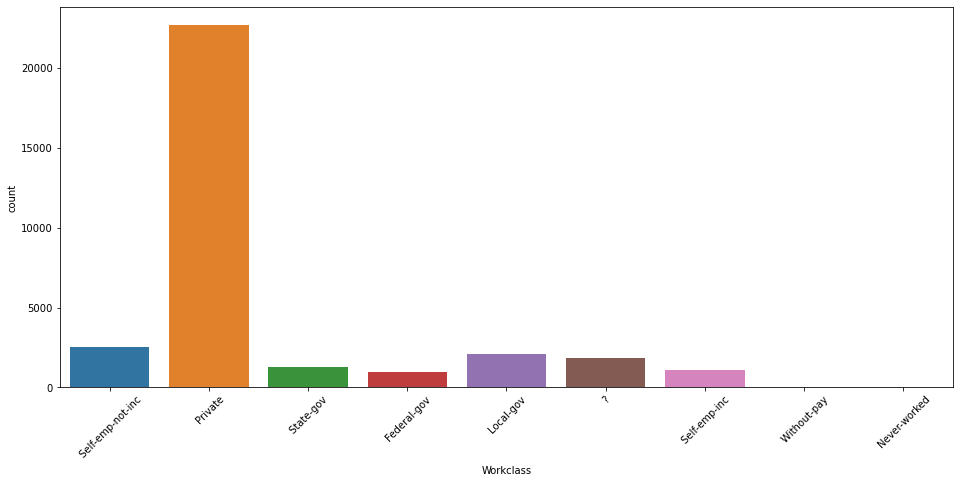

In [11]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=45)
sns.countplot(df['Workclass'])

Most of the people are from Private workclass category. All the other category have very less entries.<br>
There is a category with '?'. This might be a missing value.

In [12]:
df[df['Workclass']=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [13]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

' ?' would be the missing values in dataset. Let's replace ' ?' with " Private".<br>
**Please notice the space before the category.**

In [14]:
df['Workclass'].replace(" ?"," Private", inplace=True)

In [15]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Done. Let's move forward with other columns

In [16]:
df['Fnlwgt'].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: Fnlwgt, dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

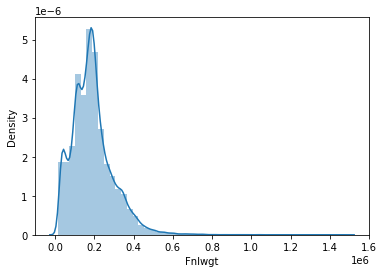

In [17]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

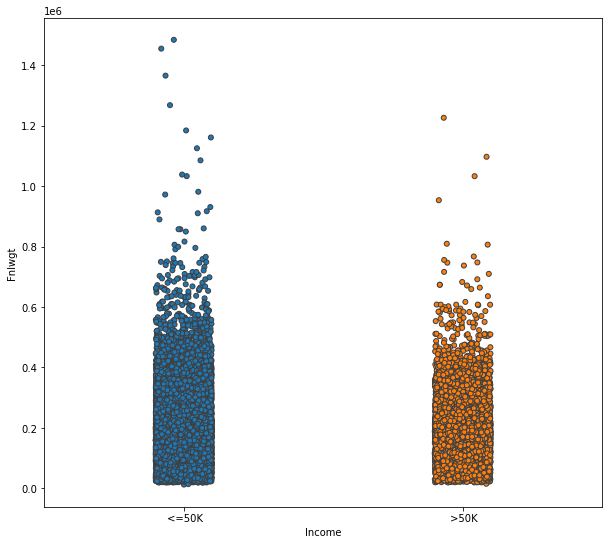

In [18]:
plt.figure(figsize=(10,9))
sns.stripplot(df['Income'], df['Fnlwgt'],linewidth=1)

People making more money have a slight shorter range than people making less money.

<AxesSubplot:xlabel='Education', ylabel='count'>

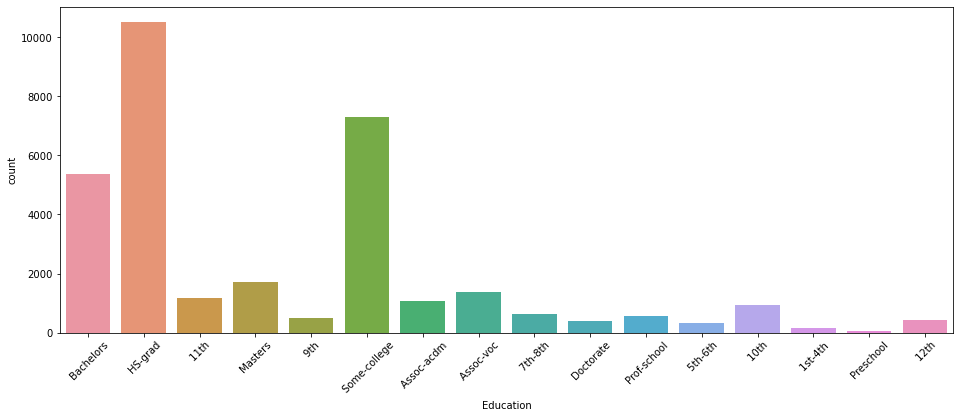

In [19]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Education'])

In [20]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Most people had eduction till HS-grad, Some-college and Bachelors. However, there are categories with school standard. Let us classify these categories into single category and call it School

In [21]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
df['Education'].replace([' 11th',' 9th',' 7th-8th',' 5th-6th',' 10th',' 1st-4th',' 12th'],' School', inplace=True)

In [23]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4202
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

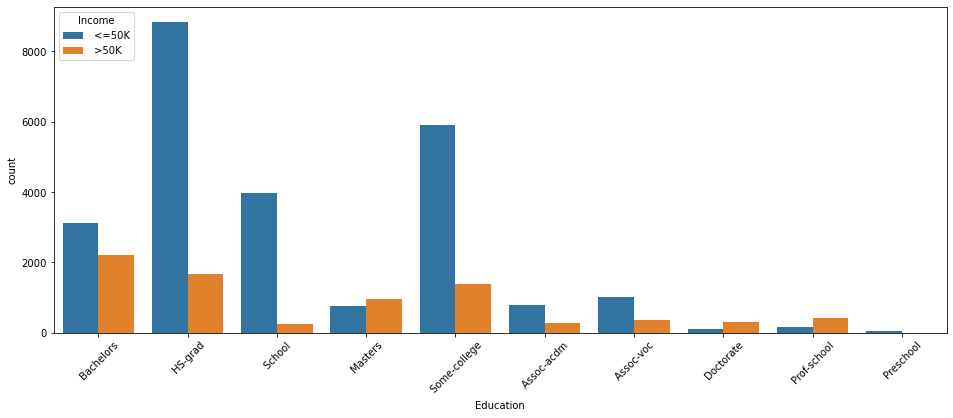

In [24]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Education'], hue = df['Income'])

People who have done bachelors have more income. People doing master has a more probability of earning more income.<br>
same is with Doctotate and prof-school

All done. Let's move forward.

<AxesSubplot:xlabel='Education_num', ylabel='Count'>

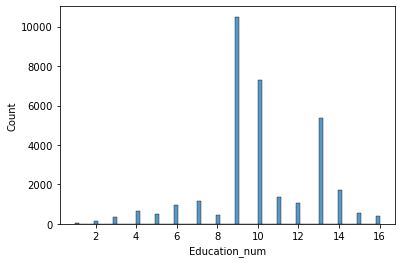

In [25]:
sns.histplot(df['Education_num'])

In [26]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [27]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Looking at the values, these numbers were the order for Education Column.<br>
We will drop these column when model building as this won't be necessary.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

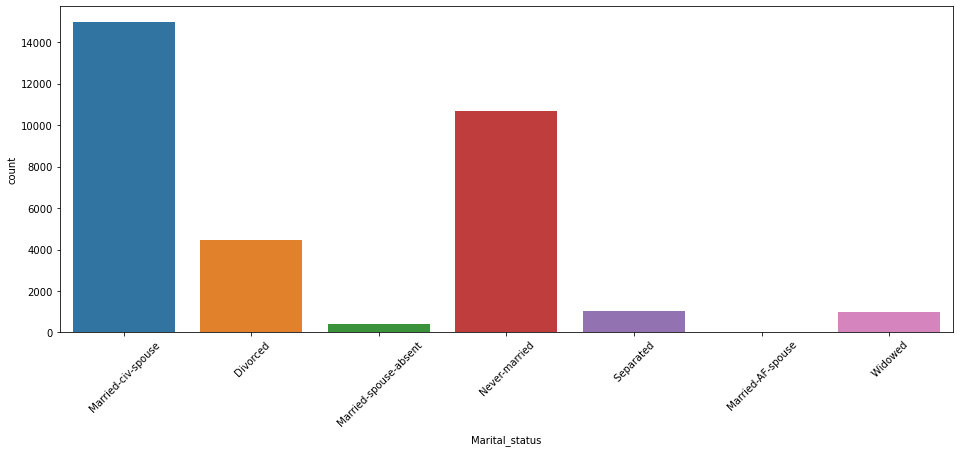

In [28]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Marital_status'])

In [29]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Most of the people fall in category ' Married-civ-spouse'.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

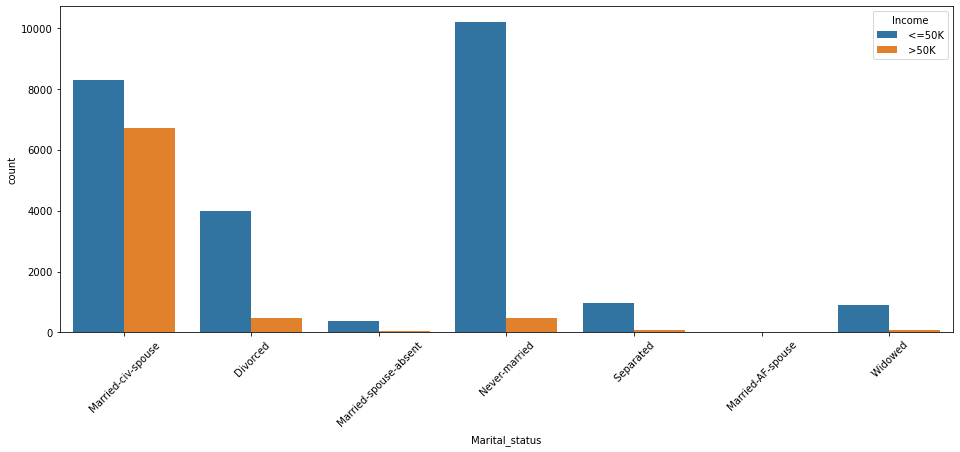

In [30]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Marital_status'], hue=df['Income'])

People falling under ' Married-civ-spouse' has more income.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

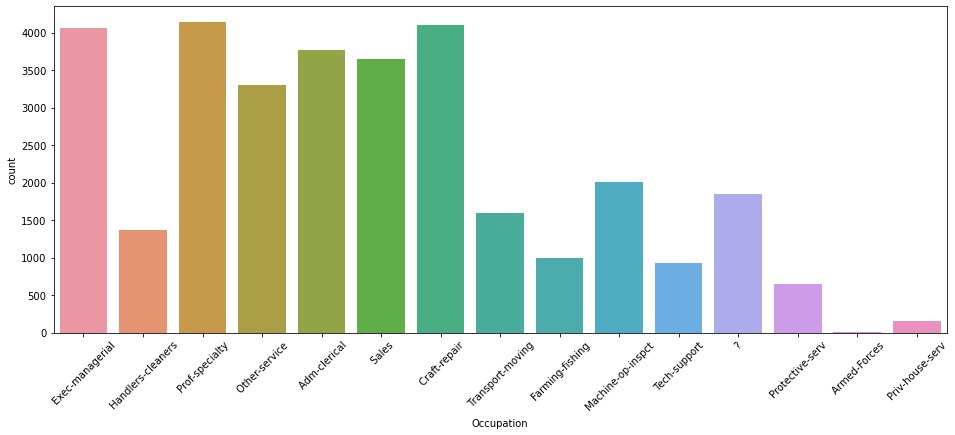

In [31]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Occupation'])

We see missing values in this column as well, let's replace them.

In [32]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [33]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
df['Occupation'].replace(' ?', ' Prof-specialty', inplace=True)

Most of the people are from ' Prof-specialty'

<AxesSubplot:xlabel='Occupation', ylabel='count'>

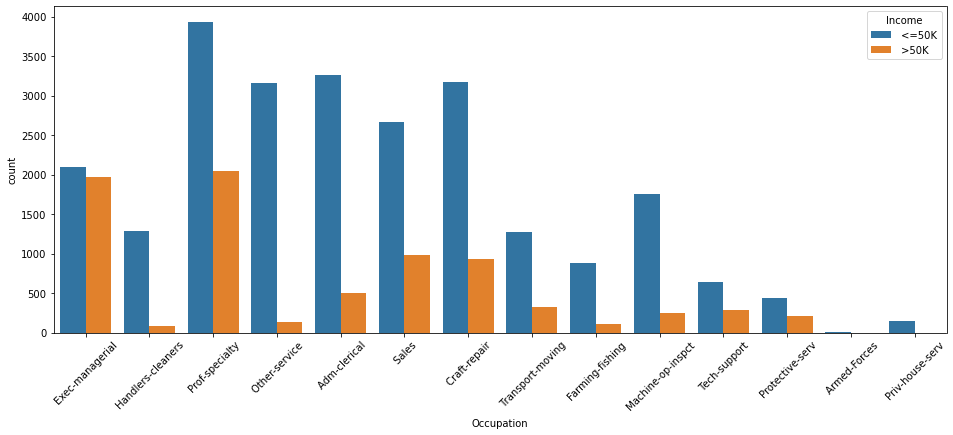

In [35]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Occupation'], hue=df['Income'])

Executive Managerial and prof-speciality has more income entires.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

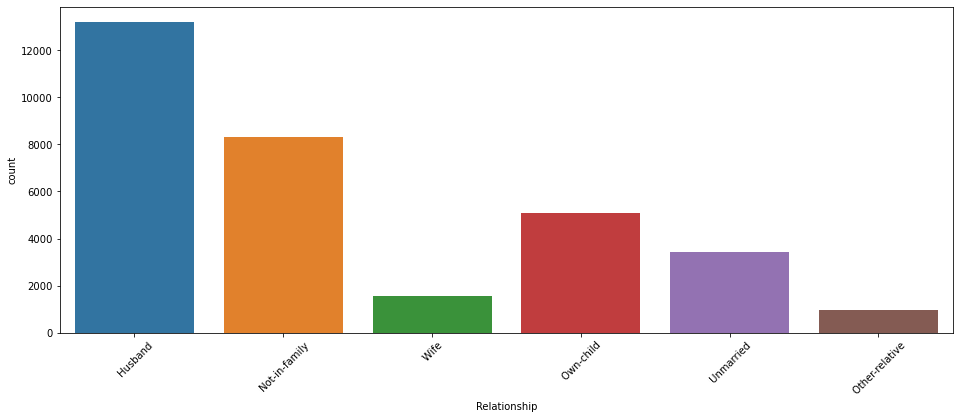

In [36]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Relationship'])


<AxesSubplot:xlabel='Relationship', ylabel='count'>

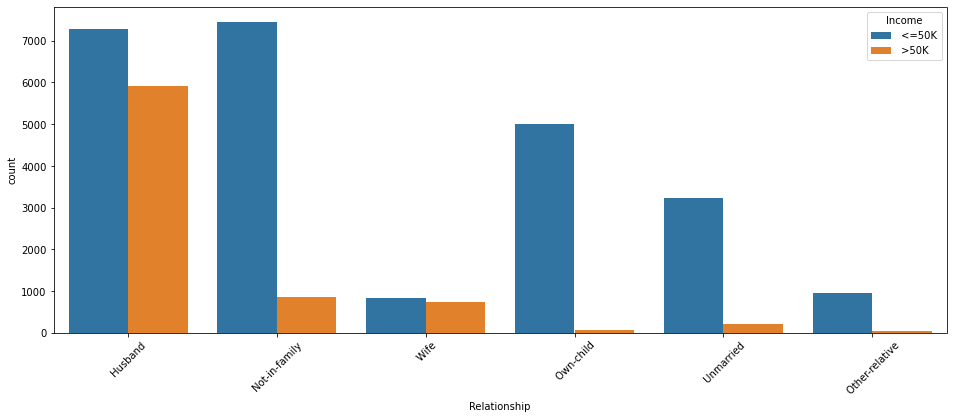

In [37]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Relationship'], hue=df['Income'])

Husbands have more income chances, then Wife and Not-in-family.

<AxesSubplot:xlabel='Race', ylabel='count'>

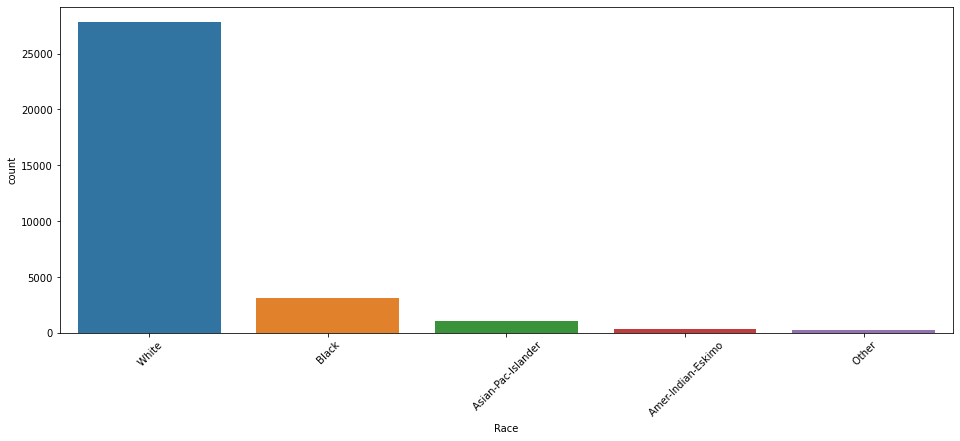

In [38]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Race'])

There are three categories that has very few entries. Let's combine them into one class.

In [39]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [40]:
df['Race'].replace([' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other'], 'Other', inplace=True)

<AxesSubplot:xlabel='Race', ylabel='count'>

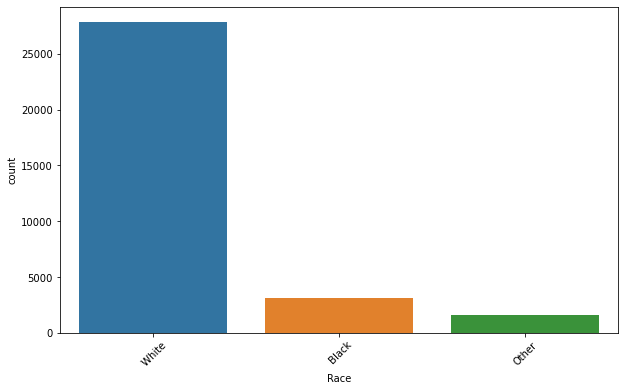

In [41]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(df['Race'])

<AxesSubplot:xlabel='Race', ylabel='count'>

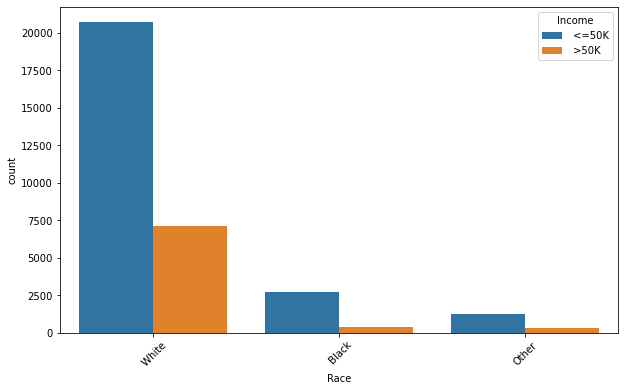

In [42]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(df['Race'], hue = df['Income'])

White people are making more money.

<AxesSubplot:xlabel='Sex', ylabel='count'>

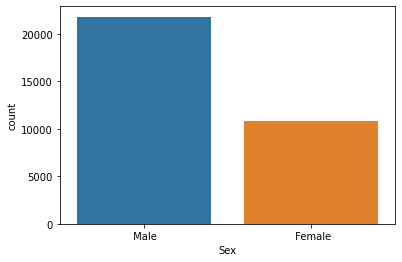

In [43]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

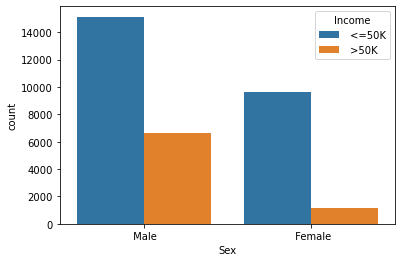

In [44]:
sns.countplot(df['Sex'], hue=df['Income'])

Males make more money. This can be expected as there are more number Husbands inturn males.

<AxesSubplot:>

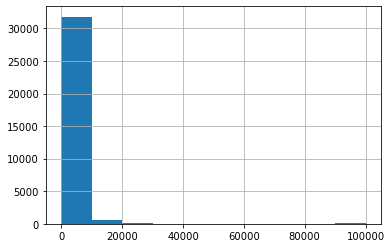

In [45]:
df['Capital_gain'].hist()

In [46]:
df['Capital_gain'].describe()

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

<AxesSubplot:>

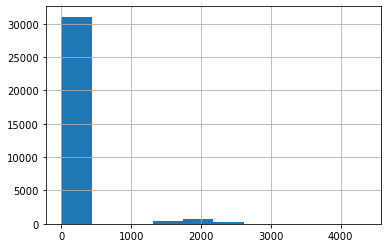

In [47]:
df['Capital_loss'].hist()

In [48]:
df['Capital_loss'].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_loss, dtype: float64

<AxesSubplot:>

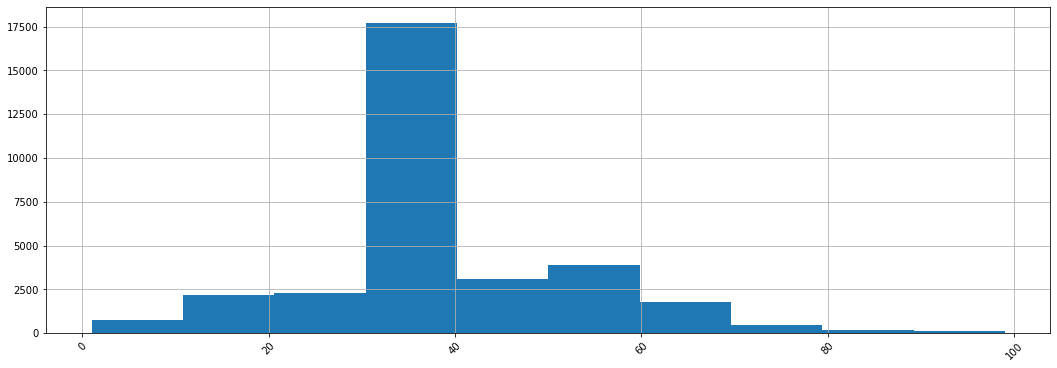

In [49]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
df['Hours_per_week'].hist()

<AxesSubplot:xlabel='Native_country', ylabel='count'>

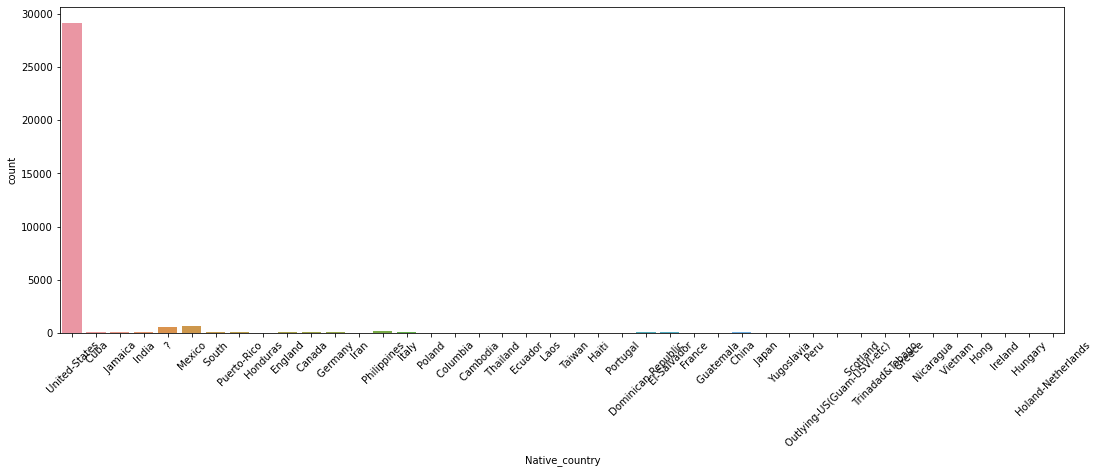

In [50]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.countplot(df['Native_country'])

In [51]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [52]:
df['Native_country'].replace([' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], ' Other', inplace=True)

In [53]:
df['Native_country'].unique()

array([' United-States', ' Other'], dtype=object)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

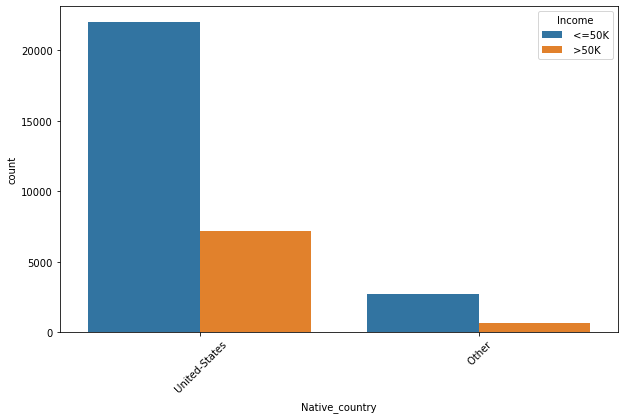

In [54]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(df['Native_country'], hue=df['Income'])

## Encoding

We will now encode the columns so that we can pass the data into an Algorithm.

In [55]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

As this is a target variable, we have encoded them in binary numbers. Let's look at each of the columns to encode them.

In [56]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [57]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

This would be a nominal column, we will use OneHot Encoding on this column.

In [58]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' School', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school',
       ' Preschool'], dtype=object)

We will map them according to an order. As using a LabelEncoder will return numbers based on initail string letter of the category.

In [59]:
df['Education'] = df['Education'].map({' Preschool':1,' School':2,' HS-grad':3, ' Some-college':4,' Assoc-voc':5,
                                      ' Assoc-acdm':6,' Bachelors':7,' Masters':8,' Prof-school':9,' Doctorate':10})

We will now drop Education_num column.

In [60]:
df.drop('Education_num', axis=1, inplace=True)

In [61]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

This would also be a nominal feature.

In [62]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Same with this column

In [63]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Same with this column. Race and Sex column would also be nominal features.

<AxesSubplot:>

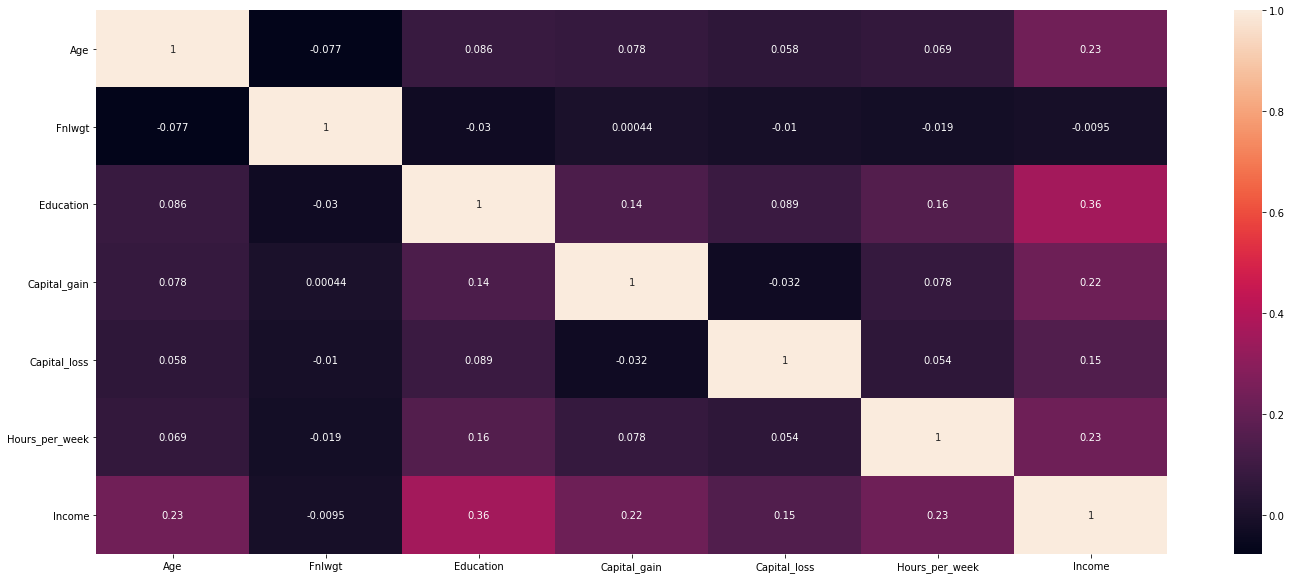

In [64]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(), annot=True)

We will drop the Fnlwgt column as it has very low correlation with Income feature.

In [65]:
df.drop('Fnlwgt', axis=1, inplace=True)

## Using get_dummies on Object data type columns.

In [66]:
dummies = pd.get_dummies(df[['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country']], drop_first=True)

In [67]:
df.drop(['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country'],axis=1,inplace=True)

In [68]:
merged = pd.concat([df,dummies], axis='columns')

We have now encoded all the fetaures.

In [69]:
merged

,Age,Education,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Race_Other,Sex_ Male,Native_country_ United-States
0,50,7,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,38,3,0,0,40,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
2,53,2,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,28,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,37,8,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,6,0,0,38,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
32556,40,3,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
32557,58,3,0,0,40,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
32558,22,3,0,0,20,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


In [70]:
df = merged

# SKEWNESS AND OUTLIERS.


In [71]:
df.skew()

Age                                       0.558738
Education                                 0.820073
Capital_gain                             11.953690
Capital_loss                              4.594549
Hours_per_week                            0.227636
Income                                    1.212383
Workclass_ Local-gov                      3.553376
Workclass_ Never-worked                  68.182528
Workclass_ Private                       -1.176086
Workclass_ Self-emp-inc                   5.119915
Workclass_ Self-emp-not-inc               3.146333
Workclass_ State-gov                      4.706125
Workclass_ Without-pay                   48.196771
Marital_status_ Married-AF-spouse        37.587006
Marital_status_ Married-civ-spouse        0.160720
Marital_status_ Married-spouse-absent     8.655325
Marital_status_ Never-married             0.732408
Marital_status_ Separated                 5.366657
Marital_status_ Widowed                   5.461111
Occupation_ Armed-Forces       

'Capital_gain', 'Capital_loss', 'Hours_per_week' we will need to check outliers and skewness for these columns

In [72]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

Before moving forward, I will add 1 to the columns 'Capital_gain', 'Capital_loss' so that our transformations can be done easily.

In [73]:
df['Capital_gain']= df['Capital_gain'] + 1
df['Capital_loss']= df['Capital_loss'] + 1

## Column Capital_gain

In [74]:
df['Capital_gain'].describe()

count     32560.000000
mean       1078.615172
std        7385.402999
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      100000.000000
Name: Capital_gain, dtype: float64

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

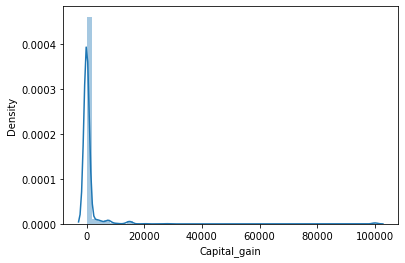

In [75]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_gain'>

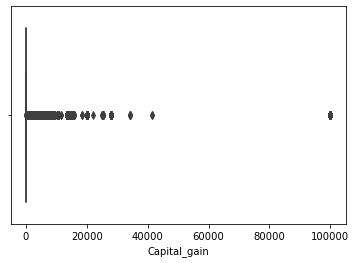

In [76]:
sns.boxplot(df['Capital_gain'])

In [77]:
outlier_normally(df,'Capital_gain')

(-21077.593823659423, 23234.824167639767)

In [78]:
df[df['Capital_gain']>23234.824167639767].shape

(215, 41)

In [79]:
df = df[df['Capital_gain']<=23233.824167639767]

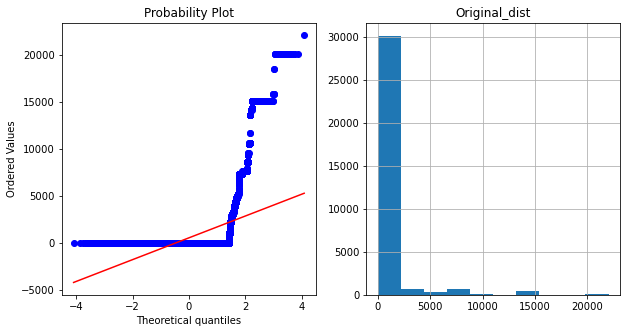

In [80]:
original_dist(df,'Capital_gain')

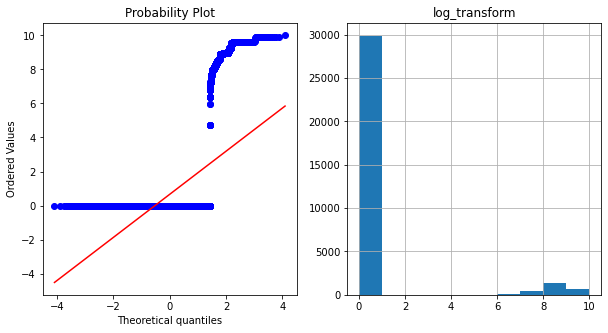

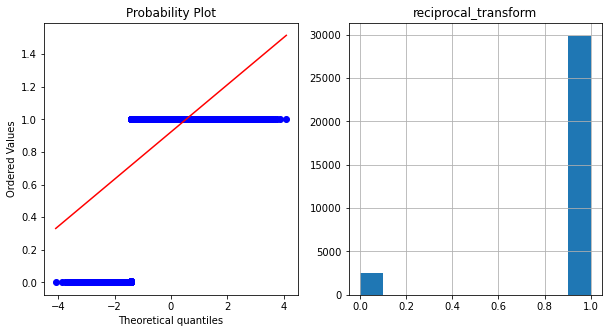

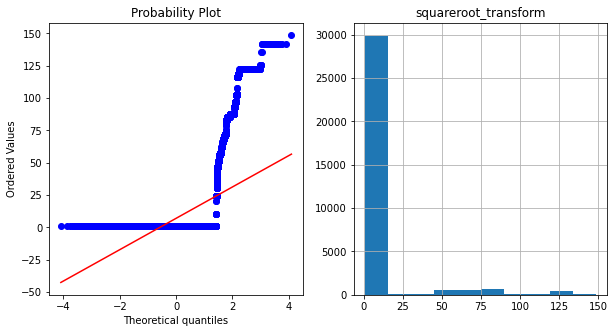

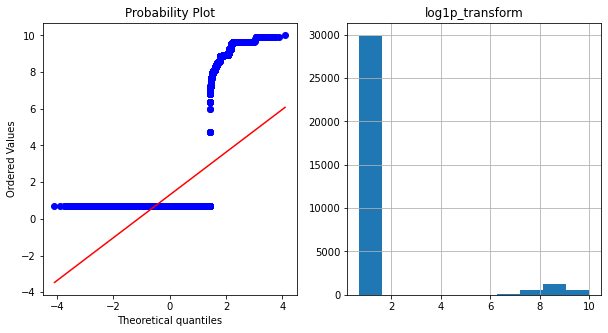

In [81]:
log_transform(df,'Capital_gain')

reciprocal_transform(df,'Capital_gain')

squareroot_transform(df,'Capital_gain')

log1p_transform(df,'Capital_gain')

In [82]:
df['Capital_gain'].skew()

5.084782359504122

In [83]:
((df['Capital_gain'])**(1/5)).skew()

3.3421116851361714

## Capital Capital_loss

In [84]:
df['Capital_loss'].describe()

count    32345.000000
mean        88.886845
std        404.240132
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       4357.000000
Name: Capital_loss, dtype: float64

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

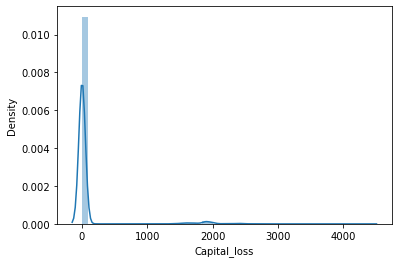

In [85]:
sns.distplot(df['Capital_loss'])

<AxesSubplot:xlabel='Capital_loss'>

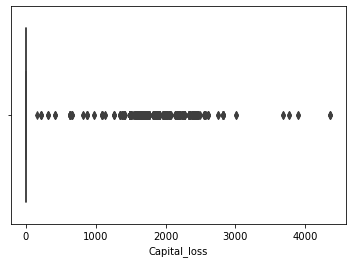

In [86]:
sns.boxplot(df['Capital_loss'])

In [87]:
outlier_normally(df,'Capital_loss')

(-1123.8335499717657, 1301.6072398774697)

In [88]:
df[df['Capital_loss']>1301.6072398774697].shape

(1470, 41)

In [89]:
df = df[df['Capital_loss']<=1301.6072398774697]

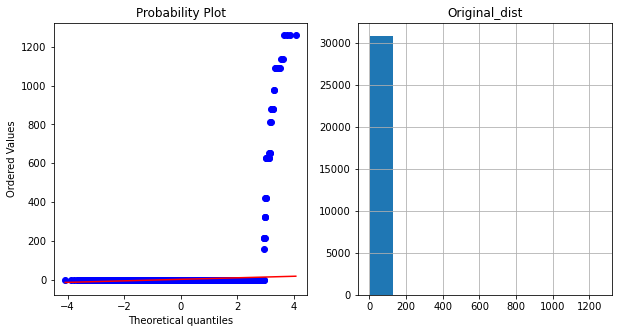

In [90]:
original_dist(df,'Capital_loss')

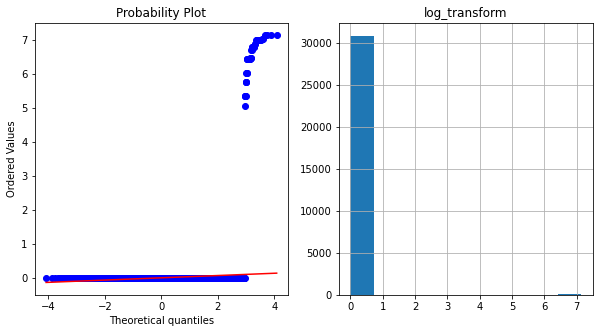

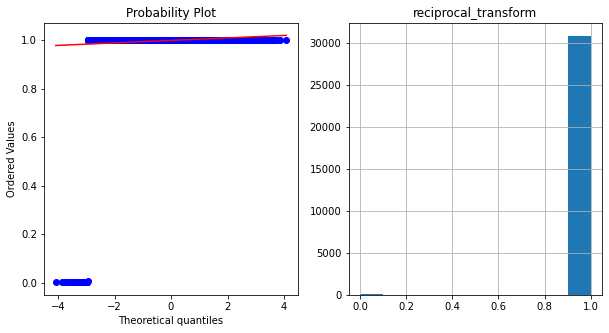

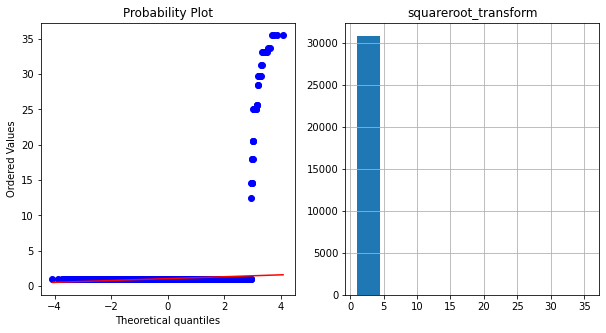

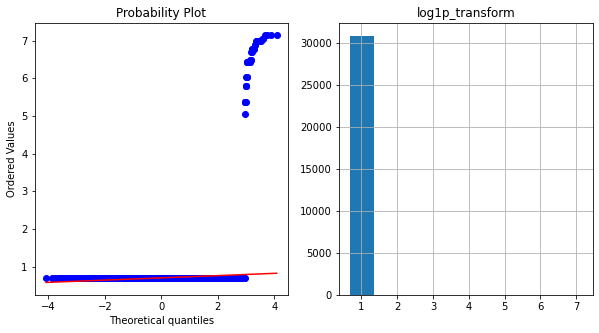

In [91]:
log_transform(df,'Capital_loss')

reciprocal_transform(df,'Capital_loss')

squareroot_transform(df,'Capital_loss')

log1p_transform(df,'Capital_loss')

In [92]:
df['Capital_loss'] = (np.log(df['Capital_loss']))
df['Capital_loss'].skew()

25.286630243251047

As we are not able to reduce the skewness, we will make sure **to use Tree Algorithms**. 

In [93]:
df['Income'].value_counts()

0    24013
1     6862
Name: Income, dtype: int64

In [94]:
df.shape

(30875, 41)

**Class 0 is <=50k and class 1 is >50K**

**class 0 has 77.77% of data and class 1 has 22.22% data. We will consider this problem as data imbalance problem**

# DEALING WITH DATA IMBALANCE PROBLEM.

In [95]:
x = df.drop('Income',axis=1)
y = df['Income']

## Method1:  UnderSampling.


In [96]:
inc_grt = df[df['Income']==1]
inc_low = df[df['Income']==0]

In [97]:
inc_grt.shape

(6862, 41)

In [98]:
inc_low.shape

(24013, 41)

We would want 6862 samples from inc_low.

In [99]:
Under_sample = inc_low.sample(6862)

In [100]:
test_under = pd.concat([Under_sample, inc_grt], axis=0)

In [101]:
test_under['Income'].value_counts()

1    6862
0    6862
Name: Income, dtype: int64

We have created a new DataFrame with same amount of two classes for this data.

In [102]:
x1 = test_under.drop('Income', axis=1)
y1 = test_under['Income']

## Finding the best random state for the model


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.7730418943533698 on random state 28


We will try other technique and se if we get a better acciracy score than 77.30%

## Method 2: OverSampling


In [105]:
over_sample = inc_grt.sample(24013, replace=True)

In [106]:
over_sample.shape

(24013, 41)

In [107]:
inc_low.shape

(24013, 41)

We got equal number of values.

In [108]:
test_over = pd.concat([inc_low, over_sample], axis=0)

In [109]:
test_over['Income'].value_counts()

1    24013
0    24013
Name: Income, dtype: int64

In [110]:
x2 = test_over.drop('Income', axis=1)
y2 = test_over['Income']

## Finding the best random state for the model


In [111]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9126587549448262 on random state 76


**Awesome we say huge jump in Accuracy from 77.30% to 91.26%**

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=76)

## Testing models

In [113]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8010618363522798
[[3766 1027]
 [ 884 3929]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4793
           1       0.79      0.82      0.80      4813

    accuracy                           0.80      9606
   macro avg       0.80      0.80      0.80      9606
weighted avg       0.80      0.80      0.80      9606



In [114]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.910056214865709
[[4091  702]
 [ 162 4651]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4793
           1       0.87      0.97      0.92      4813

    accuracy                           0.91      9606
   macro avg       0.92      0.91      0.91      9606
weighted avg       0.92      0.91      0.91      9606



In [115]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9221320008328128
[[4164  629]
 [ 119 4694]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4793
           1       0.88      0.98      0.93      4813

    accuracy                           0.92      9606
   macro avg       0.93      0.92      0.92      9606
weighted avg       0.93      0.92      0.92      9606



In [116]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8262544243181345
[[3870  923]
 [ 746 4067]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4793
           1       0.82      0.85      0.83      4813

    accuracy                           0.83      9606
   macro avg       0.83      0.83      0.83      9606
weighted avg       0.83      0.83      0.83      9606



In [117]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8456173225067666
[[3639 1154]
 [ 329 4484]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4793
           1       0.80      0.93      0.86      4813

    accuracy                           0.85      9606
   macro avg       0.86      0.85      0.84      9606
weighted avg       0.86      0.85      0.84      9606



In [118]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5924422236102436
[[4709   84]
 [3831  982]]
              precision    recall  f1-score   support

           0       0.55      0.98      0.71      4793
           1       0.92      0.20      0.33      4813

    accuracy                           0.59      9606
   macro avg       0.74      0.59      0.52      9606
weighted avg       0.74      0.59      0.52      9606



In [119]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8341661461586508
[[3864  929]
 [ 664 4149]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4793
           1       0.82      0.86      0.84      4813

    accuracy                           0.83      9606
   macro avg       0.84      0.83      0.83      9606
weighted avg       0.84      0.83      0.83      9606



Random forest performed well. However, Let's crossvalidate.

# Crossvalidation


In [120]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8457327935222672


In [121]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.8111740890688258


In [122]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.840744939271255


In [123]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8458623481781375


In [124]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.8457327935222672


In [125]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.8457327935222672


Looking at the values Random forest has more promising results. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [128]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [129]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

## Final Model

In [130]:
model1 = RandomForestClassifier(n_estimators=150, max_features= 'auto', max_depth= 9, criterion= 'gini')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

83.06266916510513
[[3664 1129]
 [ 498 4315]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      4793
           1       0.79      0.90      0.84      4813

    accuracy                           0.83      9606
   macro avg       0.84      0.83      0.83      9606
weighted avg       0.84      0.83      0.83      9606



We will try SMOTE and look at our final accuracy scores.

# Method 3: SMOTE

In [131]:
from imblearn.over_sampling import SMOTE

In [132]:
y.value_counts()

0    24013
1     6862
Name: Income, dtype: int64

In [133]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

y_sm.value_counts()

1    24013
0    24013
Name: Income, dtype: int64

## Finding the best random state for the model


In [134]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8560274828232355 on random state 98


The accuracy is low then OverSampling method, however, cannot conclude just yet.

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=98)

## Testing models

In [136]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8560274828232355
[[3969  843]
 [ 540 4254]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4812
           1       0.83      0.89      0.86      4794

    accuracy                           0.86      9606
   macro avg       0.86      0.86      0.86      9606
weighted avg       0.86      0.86      0.86      9606



In [137]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8734124505517386
[[4096  716]
 [ 500 4294]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4812
           1       0.86      0.90      0.88      4794

    accuracy                           0.87      9606
   macro avg       0.87      0.87      0.87      9606
weighted avg       0.87      0.87      0.87      9606



In [138]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8992296481365813
[[4249  563]
 [ 405 4389]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4812
           1       0.89      0.92      0.90      4794

    accuracy                           0.90      9606
   macro avg       0.90      0.90      0.90      9606
weighted avg       0.90      0.90      0.90      9606



In [139]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8652925255048928
[[4044  768]
 [ 526 4268]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4812
           1       0.85      0.89      0.87      4794

    accuracy                           0.87      9606
   macro avg       0.87      0.87      0.87      9606
weighted avg       0.87      0.87      0.87      9606



In [140]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.850197793046013
[[3596 1216]
 [ 223 4571]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      4812
           1       0.79      0.95      0.86      4794

    accuracy                           0.85      9606
   macro avg       0.87      0.85      0.85      9606
weighted avg       0.87      0.85      0.85      9606



In [141]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5994170310222777
[[4742   70]
 [3778 1016]]
              precision    recall  f1-score   support

           0       0.56      0.99      0.71      4812
           1       0.94      0.21      0.35      4794

    accuracy                           0.60      9606
   macro avg       0.75      0.60      0.53      9606
weighted avg       0.75      0.60      0.53      9606



In [142]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8669581511555278
[[4013  799]
 [ 479 4315]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4812
           1       0.84      0.90      0.87      4794

    accuracy                           0.87      9606
   macro avg       0.87      0.87      0.87      9606
weighted avg       0.87      0.87      0.87      9606



Random forest performed really well. However, Let's crossvalidate.

# Crossvalidation


In [143]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8466396761133602


In [144]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.811757085020243


In [145]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.840744939271255


In [146]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8458623481781375


In [147]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.8466396761133602


In [148]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.8466396761133602


Looking at the values Random forest has more promising results. We will Perform Hyperparameter Tuning 

## Hyperparameter Tuning

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'criterion':['gini', 'entropy'],'max_depth': np.arange(2,10),
             'max_features':['auto','sqrt', 'log2'],'n_estimators':[10,50,100,150] }

In [151]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [152]:
#Printing the best parameters.
RCV.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'entropy'}

## Final Model

In [153]:
model2 = RandomForestClassifier(n_estimators=100, max_features= 'auto', max_depth= 9, criterion= 'entropy')
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.75952529668956
[[3714 1098]
 [ 366 4428]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4812
           1       0.80      0.92      0.86      4794

    accuracy                           0.85      9606
   macro avg       0.86      0.85      0.85      9606
weighted avg       0.86      0.85      0.85      9606



# CONCLUSION.

We got good accuracy using the SMOTE technique. However, the difference is about 1.7%. We will save and submit model using SMOTE.

# SAVING THE BEST MODEL FOR SUBMISSION.

model2 from SMOTE would be the best model with 84.75% accuracy.

In [156]:
import joblib
joblib.dump(model2,"Census_Income_Project_submission.pkl")

['Census_Income_Project_submission.pkl']